In [3]:
%pip install wfdb
%pip install tensorflow
%pip install tsfel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 3.4/332.0 MB 29.4 MB/s eta 0:00:12
   - -------------------------------------- 11.0/332.0 MB 29.3 MB/s eta 0:00:11
   -- ------------------------------------- 19.7/332.0 MB 33.5 MB/s eta 0:00:10
   --- ------------------------------------ 26.7/332.0 MB 33.8 MB/s eta 0:00:10
   ---- ----------------------------------- 34.1/332.0 MB 33.9 MB/s eta 0:00:09
   ---- ----------------------------------- 41.2/332.0 MB 34.0 MB/s eta 0:00:09
   ----- ---------------------------------- 48.2/332.0 MB 34.1 MB/s eta 0:00:09
   ------ --------------------------------- 55.6/332.0 MB 34.1 MB/s eta 0:00:09
   ------- -------------------------------- 62.7/332.0 MB 34.1 MB/s eta 0:00:08
   -------- ------------------------------- 69.7/332.0 MB 34.2 MB/s eta 0:00:08
   --------- ------------------------------ 77.1/332.0 MB 34.2 MB/s eta 0:00:08
   ---------- ----------------------------- 84.1/3

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 4.2/4.2 MB 25.5 MB/s  0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -------------------------- ------------- 5.2/8.0 MB 26.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 28.8 MB/s  0:00:00
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ----------------------------- ---------- 7.1/9.5 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 29.6 MB/s  0:00:00

   ----- ---------------------------------- 1/7 [PyWavelets]
   ----- ---------------------------------- 1/7 [PyWavelets]
   ----- ---------------------------------- 1/7 [PyWavelets]
   ----- ---------------------------------- 1/7 [PyWavelets]
   ----------- ---------------------------- 2/7 [patsy]
   ----------- ---------------------------- 2/7 [patsy]
   ----------- ---------------------------- 2/7 [patsy]
   -


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix, classification_report

## Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, LSTM, MaxPooling1D, GlobalAveragePooling1D, MaxPooling2D,Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Feature extraction
import tsfel

In [4]:
import DataLoader
path = r"C:\Users\willi\Desktop\PTBXL\\"

ecg_data, patient_data = DataLoader.loader(path)

ECG Data Shape: (21799, 1000, 12)
Patient Data Head:
        patient_id   age  sex  height  weight  nurse  site     device  \
ecg_id                                                                  
1          15709.0  56.0    1     NaN    63.0    2.0   0.0  CS-12   E   
2          13243.0  19.0    0     NaN    70.0    2.0   0.0  CS-12   E   
3          20372.0  37.0    1     NaN    69.0    2.0   0.0  CS-12   E   
4          17014.0  24.0    0     NaN    82.0    2.0   0.0  CS-12   E   
5          17448.0  19.0    1     NaN    70.0    2.0   0.0  CS-12   E   

             recording_date                                  report  ...  \
ecg_id                                                               ...   
1       1984-11-09 09:17:34  sinusrhythmus periphere niederspannung  ...   
2       1984-11-14 12:55:37     sinusbradykardie sonst normales ekg  ...   
3       1984-11-15 12:49:10              sinusrhythmus normales ekg  ...   
4       1984-11-15 13:44:57              sinusrhythmus 

In [5]:
patient_data['class'].value_counts()

class
[NORM]                 9069
[MI]                   2532
[STTC]                 2400
[CD]                   1708
[CD, MI]               1278
[STTC, HYP]             781
[STTC, MI]              599
[HYP]                   535
[STTC, CD]              471
[]                      411
[NORM, CD]              407
[STTC, HYP, MI]         358
[HYP, CD]               238
[STTC, CD, MI]          220
[HYP, MI]               179
[STTC, CD, HYP]         113
[CD, HYP, MI]           111
[STTC, HYP, CD]          98
[CD, STTC, HYP, MI]      97
[CD, HYP]                62
[STTC, CD, HYP, MI]      51
[NORM, STTC]             28
[MI, CD]                 19
[NORM, STTC, CD]          5
[MI, HYP, CD]             5
[HYP, STTC, CD, MI]       4
[MI, HYP]                 4
[MI, STTC, CD]            3
[MI, STTC, HYP]           3
[MI, STTC, CD, HYP]       2
[NORM, HYP, CD]           2
[NORM, HYP]               2
[MI, STTC, HYP, CD]       2
[MI, CD, HYP]             1
[MI, NORM, HYP, CD]       1
Name: count, d

In [10]:
import DataLoader
patient_data = DataLoader.map_classes(patient_data)
patient_data['mapped_class'].value_counts()

mapped_class
Normal ECG                9513
ST/T Change               5091
Conduction Disturbance    3256
Myocardial Infarction     2572
Hypertrophy                956
Other                      411
Name: count, dtype: int64

In [9]:
patient_data

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,class,class2,mapped_class
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM],NORM,Normal ECG
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM],NORM,Normal ECG
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM],NORM,Normal ECG
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM],NORM,Normal ECG
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM],NORM,Normal ECG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,[STTC],NDT,ST/T Change
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM],NORM,Normal ECG
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,[STTC],ISCAS,ST/T Change


In [11]:
patient_data['class'].value_counts()


class
[NORM]                 9069
[MI]                   2532
[STTC]                 2400
[CD]                   1708
[CD, MI]               1278
[STTC, HYP]             781
[STTC, MI]              599
[HYP]                   535
[STTC, CD]              471
[]                      411
[NORM, CD]              407
[STTC, HYP, MI]         358
[HYP, CD]               238
[STTC, CD, MI]          220
[HYP, MI]               179
[STTC, CD, HYP]         113
[CD, HYP, MI]           111
[STTC, HYP, CD]          98
[CD, STTC, HYP, MI]      97
[CD, HYP]                62
[STTC, CD, HYP, MI]      51
[NORM, STTC]             28
[MI, CD]                 19
[NORM, STTC, CD]          5
[MI, HYP, CD]             5
[HYP, STTC, CD, MI]       4
[MI, HYP]                 4
[MI, STTC, CD]            3
[MI, STTC, HYP]           3
[MI, STTC, CD, HYP]       2
[NORM, HYP, CD]           2
[NORM, HYP]               2
[MI, STTC, HYP, CD]       2
[MI, CD, HYP]             1
[MI, NORM, HYP, CD]       1
Name: count, d

In [20]:
import pandas as pd
df = pd.DataFrame()

# Extract only the first lead from the ECG signal
df['ecg_signal'] = list(ecg_data)
df['diagnosis'] = patient_data['mapped_class'].values
df['age'] = patient_data['age'].values
df = df[(df['age'] <= 100) & (df['age'] >= 18)]
df



,ecg_signal,diagnosis,age
0,"[[-0.119, -0.055, 0.064, 0.086, -0.091, 0.004,...",Normal ECG,56.0
1,"[[0.004, 0.138, 0.134, -0.072, -0.065, 0.136, ...",Normal ECG,19.0
2,"[[-0.029, -0.079, -0.049, 0.054, 0.011, -0.064...",Normal ECG,37.0
3,"[[-0.054, -0.138, -0.083, 0.096, 0.015, -0.11,...",Normal ECG,24.0
4,"[[-0.034, -0.574, -0.54, 0.304, 0.253, -0.556,...",Normal ECG,19.0
...,...,...,...
21793,"[[-0.076, -0.029, 0.046, 0.052, -0.061, 0.008,...",Conduction Disturbance,63.0
21794,"[[-0.052, -0.034, 0.018, 0.043, -0.034, -0.008...",ST/T Change,67.0
21796,"[[0.038, 0.024, -0.014, -0.03, 0.026, 0.005, 0...",ST/T Change,59.0
21797,"[[-0.057, -0.057, 0.0, 0.057, -0.028, -0.028, ...",Normal ECG,64.0


In [21]:
df.loc[0, 'ecg_signal']

array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
       [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
       [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
       ...,
       [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
       [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
       [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]],
      shape=(1000, 12))

In [ ]:
df.drop(columns='age', inplace=True)
df = df[df['diagnosis'] != 'Other']
df

,ecg_signal,diagnosis
0,"[[-0.119, -0.055, 0.064, 0.086, -0.091, 0.004,...",Normal ECG
1,"[[0.004, 0.138, 0.134, -0.072, -0.065, 0.136, ...",Normal ECG
2,"[[-0.029, -0.079, -0.049, 0.054, 0.011, -0.064...",Normal ECG
3,"[[-0.054, -0.138, -0.083, 0.096, 0.015, -0.11,...",Normal ECG
4,"[[-0.034, -0.574, -0.54, 0.304, 0.253, -0.556,...",Normal ECG
...,...,...
21793,"[[-0.076, -0.029, 0.046, 0.052, -0.061, 0.008,...",Conduction Disturbance
21794,"[[-0.052, -0.034, 0.018, 0.043, -0.034, -0.008...",ST/T Change
21796,"[[0.038, 0.024, -0.014, -0.03, 0.026, 0.005, 0...",ST/T Change
21797,"[[-0.057, -0.057, 0.0, 0.057, -0.028, -0.028, ...",Normal ECG


In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


X = np.stack(df["ecg_signal"].to_numpy())  


le = LabelEncoder()
y_int = le.fit_transform(df["diagnosis"])
y = to_categorical(y_int)


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_int
)

print("X:", X_train.shape, "y:", y_train.shape)


X: (16776, 1000, 12) y: (16776, 5)


In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models

timesteps = X_train.shape[1]
channels  = X_train.shape[2]
n_classes = y_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(timesteps, channels)),

    layers.Conv1D(32, kernel_size=7, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=5, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling1D(),

    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(n_classes, activation="softmax")
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 1000, 32)       │         2,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1000, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 500, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 500, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 250, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 250, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 250, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,781 (217.89 KB)

 Trainable params: 55,333 (216.14 KB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8005 - loss: 0.5378 - val_accuracy: 0.7618 - val_loss: 0.6623 - learning_rate: 1.2500e-04
Epoch 2/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8016 - loss: 0.5353 - val_accuracy: 0.7628 - val_loss: 0.6587 - learning_rate: 1.2500e-04
Epoch 3/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.8064 - loss: 0.5270 - val_accuracy: 0.7549 - val_loss: 0.6848 - learning_rate: 1.2500e-04
Epoch 4/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8045 - loss: 0.5268 - val_accuracy: 0.7625 - val_loss: 0.6645 - learning_rate: 1.2500e-04
Epoch 5/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8056 - loss: 0.5245 - val_accuracy: 0.7580 - val_loss: 0.6883 - learning_rate: 1.2500e-04
Epoch 6/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.8073 - loss: 0.5138 - val_accuracy: 0.7611 - val_loss: 0.6679 - learning_rate: 6.2500e-05
Epoch 7/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/ste

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(X_val).argmax(axis=1)
y_true = y_val.argmax(axis=1)

print(classification_report(y_true, y_pred, target_names=le.classes_))
print(confusion_matrix(y_true, y_pred))

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
                        precision    recall  f1-score   support

Conduction Disturbance       0.73      0.66      0.69       631
           Hypertrophy       0.51      0.19      0.27       187
 Myocardial Infarction       0.61      0.55      0.58       509
            Normal ECG       0.83      0.92      0.87      1875
           ST/T Change       0.74      0.76      0.75       992

              accuracy                           0.76      4194
             macro avg       0.68      0.61      0.63      4194
          weighted avg       0.75      0.76      0.75      4194

[[ 415    5   49   82   80]
 [  44   35   14   62   32]
 [  25    8  281  109   86]
 [  27    9   53 1718   68]
 [  59   12   62  109  750]]


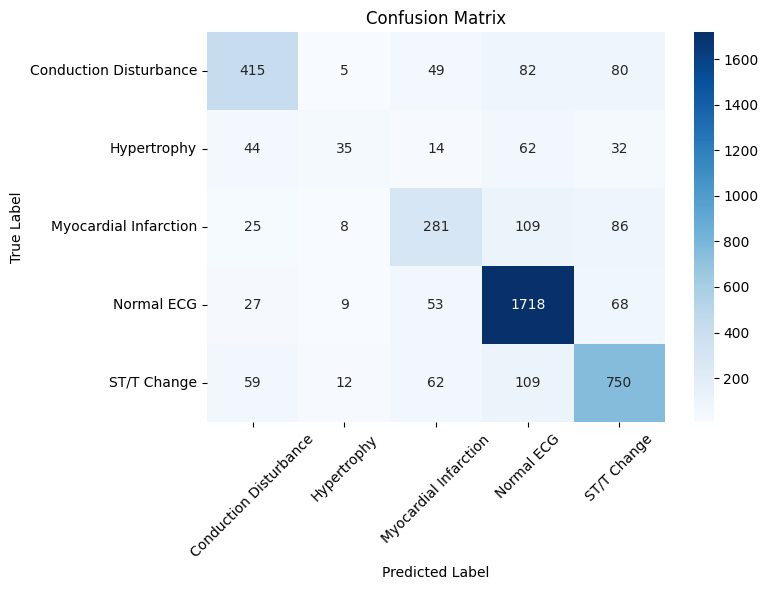

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_true, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.heatmap(
    cm,
    annot=True, 
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

hyp accuracy may be low due to low number of people with it 
-SMOTE??